# Testing Azure

In [18]:
from typing_extensions import TypedDict
from typing import Optional
from langchain.chat_models import init_chat_model
from langchain_core.messages import HumanMessage
from langgraph.graph import StateGraph, START, END
from langchain_openai import AzureChatOpenAI

In [19]:
from dotenv import load_dotenv
load_dotenv()

True

In [16]:
class QuestionState(TypedDict):
    question: str
    response: Optional[str]

In [21]:
llm = init_chat_model(
    "gpt-35-turbo",
    model_provider="azure_openai",
    azure_deployment="gpt-35-turbo",
    azure_endpoint="https://kingalokai.openai.azure.com/"
)

In [23]:
def ask_llm(state: QuestionState) -> QuestionState:
    message = HumanMessage(state["question"])
    response = llm.invoke([message])
    state['response']= response.content
    return state

In [25]:
graph_builder = StateGraph(QuestionState)
graph_builder.add_node("brain", ask_llm)
graph_builder.add_edge(START,"brain")
graph_builder.add_edge("brain", END)

In [26]:
graph = graph_builder.compile()

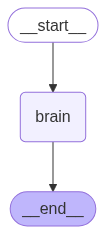

In [27]:
graph

In [28]:
messages = [HumanMessage("What is the capital of UK ?")]

In [29]:
response = llm.invoke(messages)

In [30]:
print(response.content)

The capital of the UK is London.


In [14]:
response

AIMessage(content="Inertia is the tendency of an object to resist any change in its motion or rest state. This concept is described by Newton's First Law of Motion, which states that an object will remain at rest or in uniform motion in a straight line unless acted upon by an external force. Essentially, inertia is the resistance of an object to changes in its state of motion.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 73, 'prompt_tokens': 14, 'total_tokens': 87, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': 'fp_0165350fbb', 'id': 'chatcmpl-BmOyi5kumZgH0VYoqE2kqChY5IupX', 'service_tier': None, 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'filtered': False, 'detected': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity